In [137]:
import sys
sys.path.append("../")

In [138]:
import ot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.pogw.pogw import partial_order_gromov_wasserstein

In [139]:
def sample_outlier(shape, norm=True):
    if norm:
        outlier = np.random.uniform(0, 1, shape)
    else:
        outlier = np.random.randint(0, 255, shape)
    return outlier

def add_outlier(X, n_outliers=1, norm=True):
    # Insert random outliers
    idx = np.random.randint(0, X.shape[0], n_outliers)
    for i in idx:
        # X[i] = sample_outlier(X[i].shape)
        outlier_shape = (1,*X[i].shape)
        X = np.vstack((X[:i], sample_outlier(outlier_shape, norm),X[i:]))
    return X


def add_outlier_into_idx(X,idx, n_outliers=1, norm=True):
    # Insert random outliers

    outlier_shape = (1,*X[idx].shape)
    X = np.vstack((X[:idx], sample_outlier(outlier_shape, norm),X[idx:]))
    return X

In [140]:
digit = np.random.randint(0, 10)
digit = 1

mnist_data = np.load(f"../Datasets/mnist_moving/{digit}.npy").astype(np.float64) 
usps_data = np.load(f"../Datasets/usps_moving/{digit}.npy").astype(np.float64) 
print(mnist_data.shape, usps_data.shape)
print(mnist_data.max(), mnist_data.min())
print(usps_data.max(), usps_data.min())

(20, 47, 47) (20, 35, 35)
255.0 0.0
191.0 0.0


In [141]:
mnist_data = add_outlier(mnist_data, 1, norm = False) 
usps_data = add_outlier(usps_data, 1, norm = False)
# mnist_data = add_outlier_into_idx(mnist_data, 4, 1, norm = False)
# usps_data = add_outlier_into_idx(usps_data, 16, 1, norm = True)



print(mnist_data.max(), mnist_data.min())
print(usps_data.max(), usps_data.min())
# mnist_data_ = mnist_data.copy()
# mnist_data = add_outlier(mnist_data_, 1) 
# usps_data = add_outlier(mnist_data_, 1)

255.0 0.0
254.0 0.0


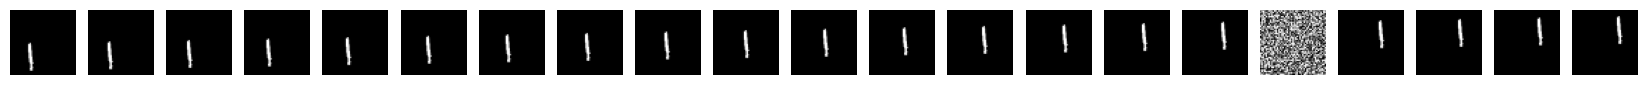

In [142]:
len_seq = mnist_data.shape[0]

plt.figure(figsize=(len_seq,len_seq))
for i in range(len_seq):
    plt.subplot(1,len_seq,i+1)
    plt.imshow(mnist_data[i], cmap="gray")
    plt.axis("off")

Swap

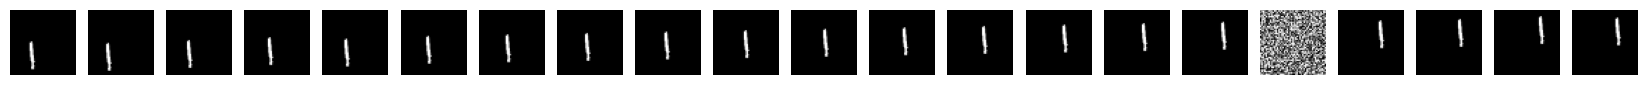

In [143]:
tmp = mnist_data[0].copy()
mnist_data[0] = mnist_data[1].copy()
mnist_data[1] = tmp

tmp = mnist_data[3].copy()
mnist_data[3] = mnist_data[4].copy()
mnist_data[4] = tmp


tmp = mnist_data[19].copy()
mnist_data[19] = mnist_data[20].copy()
mnist_data[20] = tmp

# print(np.all(mnist_data[4] == mnist_data[5]))
plt.figure(figsize=(len_seq,len_seq))
for i in range(len_seq):
    plt.subplot(1,len_seq,i+1)
    plt.imshow(mnist_data[i], cmap="gray")
    plt.axis("off")

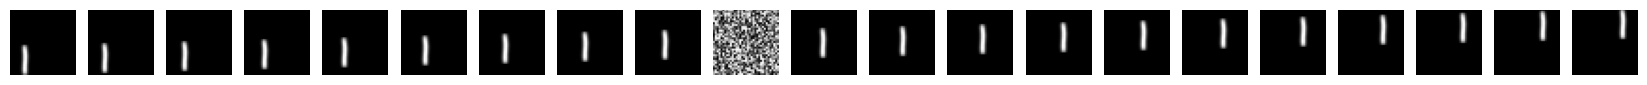

In [144]:
plt.figure(figsize=(len_seq,len_seq))
for i in range(len_seq):
    plt.subplot(1,len_seq,i+1)
    plt.imshow(usps_data[i], cmap="gray")
    plt.axis("off")

In [145]:
flatten_usps_data = np.array([i.flatten() for i in usps_data])
flatten_mnist_data = np.array([i.flatten() for i in mnist_data])

In [146]:
C1 = ot.dist(flatten_mnist_data,metric="euclidean").astype(np.float64)
C2 = ot.dist(flatten_usps_data,metric="euclidean").astype(np.float64)

C1 = C1 / C1.mean()
C2 = C2 / C2.mean()

p1 = ot.unif(C1.shape[0])
p2 = ot.unif(C2.shape[0])

<Axes: >

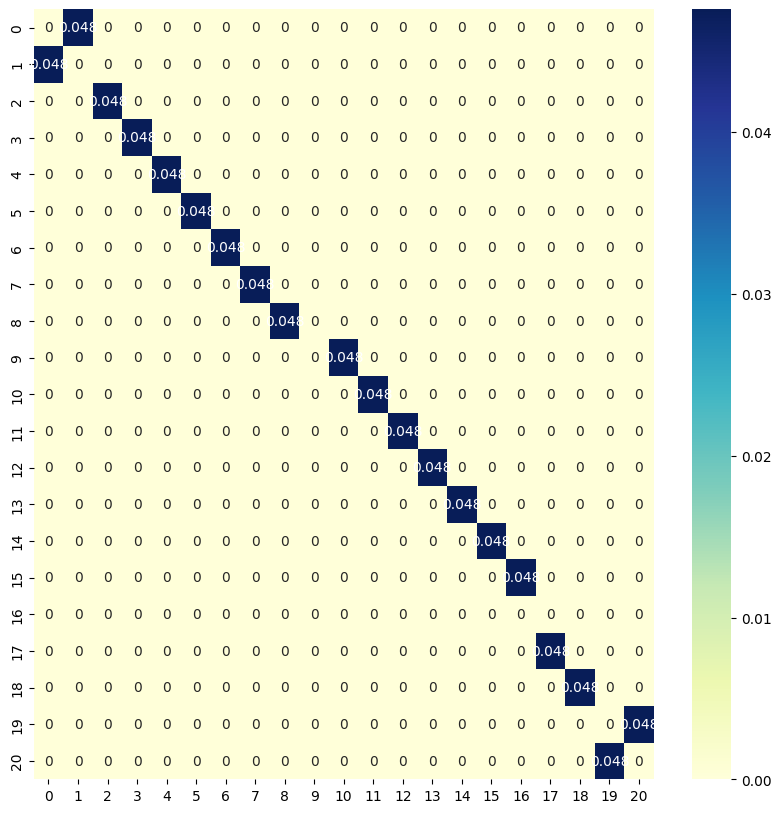

In [158]:
T = partial_order_gromov_wasserstein(C1,C2,p1,p2,m = 20/21, order_reg=0.003, return_dist=False)
plt.figure(figsize=(len_seq//2,len_seq//2))
sns.heatmap(T.round(4),cmap="YlGnBu",annot = True)

In [162]:
def soft_assigment_to_warping_path(T):
    T = T.copy()
    warping_path = []
    while T.sum() > 0:
        i,j = np.unravel_index(np.argmax(T), T.shape)
        warping_path.append((i,j))
        T[i,j] = 0
    return warping_path

warping_path = soft_assigment_to_warping_path(T)
warping_path

[(0, 1),
 (1, 0),
 (2, 2),
 (3, 3),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 10),
 (10, 11),
 (11, 12),
 (12, 13),
 (13, 14),
 (14, 15),
 (15, 16),
 (17, 17),
 (18, 18),
 (19, 20),
 (20, 19),
 (4, 4)]

In [148]:
# plt.figure(figsize=(len_seq//2,len_seq//2))
# sns.heatmap(C1.round(4),cmap="YlGnBu",annot = True)

In [149]:
# plt.figure(figsize=(len_seq//2,len_seq//2))
# sns.heatmap(C2.round(4),cmap="YlGnBu",annot = True)